# Vector Field Plotting

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp, odeint
from math import *
%matplotlib inline

# 1. The dynamical system
$dx(t) = f(x(t), u(x))$ is the normal formulation in nonlinear system to represent the dynamic system. $u(x(t))$ is the control policy and $x(t)$ is system state variable at time $t$. This is to draw a vector field of a low-dimensional dynamic system called "Van del Pol equation". I also sample several random trajectories to make the limit cycle more clear.

$\dot x=\mu(x-\frac{1}3 x^3 - y)$


$\dot y = \frac{1}\mu x$

In [98]:
# num of mesh gridworld
n_Grid = 20

ini_state1 = np.array([0.0, 0.1]).reshape(2,)
ini_state2 = np.array([-3, 3]).reshape(2,)
ini_state3 = np.array([0.0, 3.0]).reshape(2,)
ini_state4 = np.array([3.0, 0.0]).reshape(2,)
ini_state5 = np.array([2.89, 3.2]).reshape(2,)
ini_state6 = np.array([-2.8, -3]).reshape(2,)

t_span = np.array([0.0, 20.0])
dt = 0.001
num = int((t_span[1] - t_span[0]) / dt)
t_lx = np.linspace(t_span[0], t_span[1], num, endpoint=True)

x = np.linspace(-5, 5, n_Grid)
y = np.linspace(-5, 5, n_Grid)

mu = 1.0

X, Y = np.meshgrid(x, y)
u = np.zeros_like(X)
v = np.zeros_like(Y)

def dynamics(t, x, mu):
    x1 = x[0]
    x2 = x[1]
    
    dx1 = mu * (x1 - 1 / 3 * x1 * x1 * x1 - x2)
    dx2 = 1 / mu * x1
    dx = np.array([dx1, dx2])
    return dx

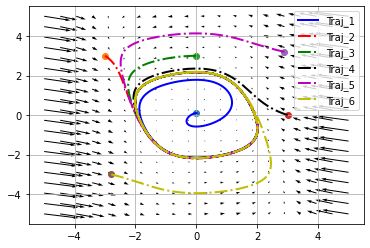

In [99]:
for i in range(n_Grid):
    for j in range(n_Grid):
        x1 = X[i][j]
        x2 = Y[i][j]
        x = np.array([x1, x2])
        dx = dynamics(_, x, mu)
        u[i][j] = dx[0]
        v[i][j] = dx[1]
        
plt.quiver(X, Y, u, v)

sol1 = odeint(dynamics, ini_state1, t_lx, args=(mu,), tfirst=True)
sol2 = odeint(dynamics, ini_state2, t_lx, args=(mu,), tfirst=True)
sol3 = odeint(dynamics, ini_state3, t_lx, args=(mu,), tfirst=True)
sol4 = odeint(dynamics, ini_state4, t_lx, args=(mu,), tfirst=True)
sol5 = odeint(dynamics, ini_state5, t_lx, args=(mu,), tfirst=True)
sol6 = odeint(dynamics, ini_state6, t_lx, args=(mu,), tfirst=True)


plt.plot(sol1[:, 0], sol1[:, 1], color="blue", linewidth=2.0, linestyle="-", label="Traj_1")
plt.scatter(ini_state1[0],ini_state1[1])

plt.plot(sol2[:, 0], sol2[:, 1], color="red", linewidth=2.0, linestyle="-.", label="Traj_2")
plt.scatter(ini_state2[0],ini_state2[1])

plt.plot(sol3[:, 0], sol3[:, 1], color="g", linewidth=2.0, linestyle="-.", label="Traj_3")
plt.scatter(ini_state3[0],ini_state3[1])

plt.plot(sol4[:, 0], sol4[:, 1], color="black", linewidth=2.0, linestyle="-.", label="Traj_4")
plt.scatter(ini_state4[0],ini_state4[1])

plt.plot(sol5[:, 0], sol5[:, 1], color="m", linewidth=2.0, linestyle="-.", label="Traj_5")
plt.scatter(ini_state5[0],ini_state5[1])

plt.plot(sol6[:, 0], sol6[:, 1], color="y", linewidth=2.0, linestyle="-.", label="Traj_6")
plt.scatter(ini_state6[0],ini_state6[1])
plt.grid('on')
plt.legend()
plt.show()